###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, T. Meier and R. Hartmann, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Ambient Noise

Die meisten seismische Methoden nutzen aktive Quellen mit hohem Signal-zu-Rausch Verhältnis, um Abbildungen des Untergrundes zu erzeugen. Neben den aktiven Verfahren läßt sich jedoch auch das Hintergrundrauschen als passive seismische Quelle nutzen. Durch Korrelation und Stapelung von langen Noisezeitreihen zweier Stationen, läßt sich der Green'sche Tensor bestimmen. Genau wie bei aktiven seismischen Daten, können seismische Abbildungs- und Inversionsverfahren auf Ambient Noise Daten angewendet werden.

Als anschauliche Einführung in das Thema "Ambient Noise" mit einigen Anwendungsbeispielen betrachten wir:

[Christoph Sens-Schönfelder (2018) Ambient Noise Tomography
fundamentals](https://www.google.de/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwiZubPg6_HiAhVDQkEAHV8FBGEQFjAAegQIBBAC&url=http%3A%2F%2Fwww.spp-mountainbuilding.de%2Fshort-course%2Fseismic_tomography%2FShortCourseTalks%2F9_Sens-Schoenfelder_Ambient-Noise-Tomography_web.pdf&usg=AOvVaw3cEwRdt8pav4gG2N3pV7y9)

Wer sich lieber YouTube Videos anschauen will, den verweise ich auf die Gutenberg Lecture von Michel Campillo:

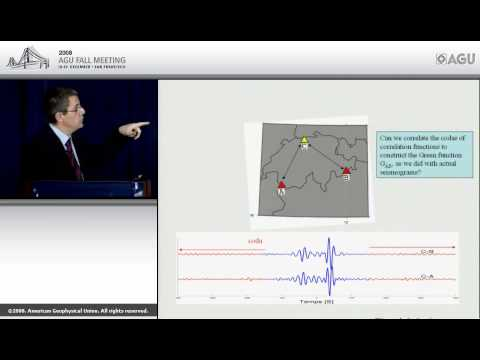

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('5rEpNGPZYgc')

Beispiele für die Anwendung der Ambient Noise Tomography von der Lithosphäre über die Kern-Mantelgrenze bis zur Anisotropie des inneren Erdkerns finden sich in 

[Boué et al. (2013) Teleseismic correlations of ambient seismic noise for deep global imaging of the Earth](https://academic.oup.com/gji/article/194/2/844/2116979)

## Beziehung zwischen Green'schem Tensor und KKF von Seismogrammen

Für das 3-Komponentenseismogramm der Station $n$ gelte:

\begin{equation}
\vec{u_n}(\omega)=G_n(\omega)\cdot\vec{f}(\omega)\notag
\end{equation}

und für die vertikale Komponente der Verschiebung bei einer Anregung durch eine vertikale Einzelkraft:

\begin{equation}
u_{n,z}(\omega)=G_{n,z}(\omega)\cdot f_{z}(\omega).\notag
\end{equation}

Hierbei ist $G_n$ der Green’sche Tensor und $\vec{f}$ die wirkende (Einzel-)Kraft.

### KKF zwischen Stationen $m$ und $n$

Mit den Annahmen

- überall Hygen’sche Punktquellen $\rightarrow$ Integration über $x$ und $y$ 
- Signale verschiedener Quellen unkorreliert

gilt für das Spektrum der KKF zwischen den Stationen $m$ und $n$:

\begin{equation}
\begin{split}
\mathfrak{F}\{\rho_{u_{m,z},u_{n,z}}(t)\}&=u_{m,z}^{\ast}(\omega)\cdot u_{n,z}(\omega)\\
&=|G_{m,z}(\omega)||G_{n,z}(\omega)||f_{z}(\omega)|^{2}\exp(i\Delta\varphi(\omega))\\
&=\int\limits_{\mathbb{R}}\int\limits_{\mathbb{R}}|G_{m,z}(\omega)||G_{n,z}(\omega)||f_{z}(\omega)|^{2}\exp(i\Delta\varphi(\omega))\mathrm{dy\;dx}
\end{split}
\notag
\end{equation}

Eliminierung des Integrals über $y$ mittels **Methode stationärer Phase**:

- Nur Quellen mit $y=0$ tragen bei ($\partial_{y}\varphi(\omega)|_{y=0}=0$)
- Nur Quellen außerhalb der Stationen $m$, $n$ tragen bei ($x\in\mathbb{R}\setminus[x_m,x_n]$)
- mit $\int_{\mathbb{R}\setminus[x_m,x_n]}A(y)\exp(i\varphi(y))\mathrm{dy}\approx\sqrt{\frac{2\pi}{\varphi^{\prime\prime}(0)}}A(0)\exp(i\varphi(0)\pm\frac{\pi}{4})$
- mit der Taylorentwicklung der Phase: $\varphi(y)\approx\varphi(0)+\varphi^{\prime}(y)\cdot y+...$

\begin{equation}
\begin{split}
\Rightarrow\text{ }&\mathfrak{F}\{\rho_{u_{m,z},u_{n,z}}(t)\}\approx\sqrt{\frac{2\pi}{\varphi^{\prime\prime}(0)}}\exp(i(\Delta\varphi(\omega)\pm\frac{\pi}{4})\int\limits_{\mathbb{R}\setminus[x_m,x_n]}A(\omega)\mathrm{dx}\\
\text{mit: }&A(\omega)=|G_{m,z}(\omega)||G_{n,z}(\omega)||f_{z}(\omega)|^{2}
\end{split}
\notag
\end{equation}

Für eine Rayleigh-Welle der Wellenzahl $k$ mit Ausbreitung...

[...] von links ($m$) nach rechts ($n$) gilt: $\Delta\varphi(\omega)=-k(\omega)\cdot R$

[...] von rechts ($n$) nach links ($m$) gilt: $\Delta\varphi(\omega)=k(\omega)\cdot R$

Wobei $R$ der Abstand zwischen den Stationen $m$ und $n$ sind.

\begin{equation}
\Rightarrow\text{ }\mathfrak{F}\{\rho_{u_{m,z},u_{n,z}}(t)\}\approx a_m(\omega)\exp(-i(k(\omega)R+\frac{\pi}{4})+a_n(\omega)\exp(i(k(\omega)R+\frac{\pi}{4})
\notag
\end{equation}

mit kausalem / akausalem Anteil:

\begin{equation*}
a_m(\omega)=\sqrt{\frac{2\pi}{\varphi^{\prime\prime}(0)}}\int\limits_{-\infty}^{x_m}A(\omega)\mathrm{dx}\;,\;\;a_n(\omega)=\sqrt{\frac{2\pi}{\varphi^{\prime\prime}(0)}}\int\limits_{x_n}^{\infty}A(\omega)\mathrm{dx}
\end{equation*}

Ebenso lässt sich der symmetrische Anteil im Zeitbereich berechnen:

\begin{equation}
\tilde{\rho}_{u_{m,z},u_{n,z}}(t)=\frac{1}{2}(\rho_{u_{m,z},u_{n,z}}(t)+\rho_{u_{m,z},u_{n,z}}(-t))\;:\;t\geq0
\notag
\end{equation}

### Auswertung (Algorithmus)

Die Green’sche Funktion zwischen zwei Seismometer Stationen kann durch wiederholte Korrelation und Stapelung aus dem Hintergrundrauschen (eng. _Ambient Noise_}) bestimmt werden. Dafür ist eine lange Registrierung des Rauschens an den zwei Stationen notwendig, Tage, Monate oder Jahre. Dabei unterscheiden wir Arbeitsschritte im Zeitbereich (ZB) und im Frequenzbereich (FB)

1. **ZB**: kontinuierliche Aufzeichnung von $u_{m,z}$ und $u_{n,z}$ an den Stationen $m$ und $n$.

2. **ZB**: Normierung der Signale $u_{m,z}$ und $u_{n,z}$ vermindert Variabilität des Rauschens. Dazu kann die Zeitreihe z.B. mit der inversen der Envelope (siehe Abschnitt _Envelopen_) gewichten werden, so werden die Signale mit hohen Energien im Zeitbereich geringer gewichtet.

3. **ZB**: Korrelation der Signale zwischen Stationen $m$ und $n$ berechnen:

     $\tilde{\rho}_{u_{m,z},u_{n,z}}(t)$

     Dies geschieht meist in 12 bzw. 24 Stundenintervallen.

4. **FB**: Whitening (Gleichgewichtung der Frequenzen):

     Um alle Signale gleich zu betrachten wird ein _whitening_ der Kreuzkorrelation im         Frequenzbereich durchgeführt. Das bedeutet, dass die Amplituden aller Frquenzen in der Kreuzkorrelation 1 sind. Starke Frequenzen werden herunter gewichtet und schwache hoch.

5. **ZB**: Stapelung über alle Zeitintervalle 

     $\Rightarrow$ Green’sche Funktion zwischen dem Stationen $m$ und $n$ zu erhalten.

6. **ZB**: Symmetrischen Anteil berechnen

7. **FB**: Korrektur der Phase $(\pm\pi/4)$:

     $k(\omega)R=\frac{\omega}{v(\omega)}\Leftrightarrow v(\omega)=\frac{\omega R}{f(\omega)+2\pi j},j\in\mathbb{Z}$
     
### AKF an einer Station $n$

Mit den Annahmen

- überall Hygen’sche Punktquellen $\rightarrow$ Integration über $x$ und $y$ 
- nur Signale gleicher Quelle
- die Green’sche Funktion der $z$-Komponente an Staion $n$ entspricht der Superposition von direkter und reflektierter Welle: $G_{n,z}(\omega)=G_{d}(\omega)+G_{r}(\omega)$

gilt für das Spektrum der AKF an der Stationen $n$:

\begin{equation}
\begin{split}
\mathfrak{F}\{\rho_{u_{n,z},u_{n,z}}(t)\}&=\int\limits_{\mathbb{R}}\int\limits_{\mathbb{R}}G_{n,z}(\omega)G_{n,z}^{\ast}(\omega)|f_{z}(\omega)|^{2}\mathrm{dy\;dx}\\
&\approx\int\limits_{\mathbb{R}}\int\limits_{\mathbb{R}}G_{d}(\omega)G_{r}^{\ast}(\omega)|f_{z}(\omega)|^{2}\mathrm{dy\;dx}\\
&\approx\int\limits_{\mathbb{R}}\int\limits_{\mathbb{R}}|G_{d}(\omega)||G_{r}(\omega)||f_{z}(\omega)|^{2}\exp(i\Delta\varphi(\omega))\mathrm{dy\;dx}
\end{split}
\notag
\end{equation}

Hierbei ist $\Delta\varphi$ die Phasenverschiebung zwischen direkter und reflektierter Welle.

Eliminierung der Integrale mittels _Methode stationärer Punkt_:


- mit $\int\limits_{\mathbb{R}}\int\limits_{\mathbb{R}}G(x,y)\exp(i\varphi(x,y)\mathrm{dy\;dx}\approx G(0,0)\exp(i(\varphi(0,0)-\frac{\pi}{2})\cdot\frac{2\pi}{b}$
- mit $b=f(\partial_x^2\varphi,\partial_y^2\varphi,\partial_z^2\varphi)$
- mit $G_0(\omega)=G(x=0,y=0,\omega)$, $\varphi_0(\omega)=\varphi(x=0,y=0,\omega)$

\begin{equation}
\begin{split}
\Rightarrow\;\mathfrak{F}\{\rho_{u_{n,z},u_{n,z}}(t)\}&\approx|G_{d,0}(\omega)||G_{r,0}(\omega)||f_{0}(\omega)|^{2}\exp(-i(\Delta\varphi_{0}(\omega)+\frac{\pi}{2}))\cdot\frac{2\pi}{b}\\
&\approx a(\omega)\exp(-i\frac{\pi}{2})\mathfrak{F}\{\rho_{g_{d,0},g_{r,0}}(t)\}
\end{split}
\notag
\end{equation}

$\Rightarrow$ Das Spektrum der AKF des Rauschens ist proportional zum Spektrum der KKF zwischen Anregung und Reflektion.